```
# Copyright 2023 by the author(s) of CHI2023 Late Breaking Work
# "Exploring Physiological Correlates of Visual Complexity Adaptation:
# Insights from EDA, ECG, and EEG Data for Adaptation Evaluation in VR
# Adaptive Systems". All rights reserved.
#
# Use of this source code is governed by a GPLv3 license that
# can be found in the LICENSE file.
```

In [1]:
import tqdm
import pandas as pd
import numpy as np
import neurokit2 as nk

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'''\usepackage{libertine}\usepackage{fontawesome5}\usepackage[dvipsnames]{xcolor}'''
plt.rcParams['ps.usedistiller'] = 'xpdf'
import seaborn as sns
sns.set_theme(style='ticks')

import warnings
warnings.filterwarnings('ignore')

from lbw import get_event_intervals

In [2]:
df_ecg = pd.read_csv('processed/ecg.csv')
df_eda = pd.read_csv('processed/eda.csv')
df_eeg = pd.read_csv('processed/eeg.csv')
df_acc = pd.read_csv('processed/accuracy.csv')

In [3]:
pids = df_ecg.pid.unique()
df = pd.merge(df_ecg[df_ecg.pid.isin(pids)], df_eda[df_eda.pid.isin(pids)], on=['pid', 'interval', 'workload'])
df = pd.merge(df, df_eeg[df_eeg.pid.isin(pids)], on=['pid', 'interval', 'workload'])
df = pd.merge(df, df_acc[df_acc.pid.isin(pids)], on=['pid', 'interval', 'workload'])
df_all = df[[ 'workload', 'ecg_rate_mean', 'ecg_rate_var',
       'hrv_rmssd','tonic_avg', 'amplitude_avg', 'peaks_num', 'alpha', 'theta', 'beta',
       'alpha_theta_ratio', 'beta_theta_ratio',
       'adAccuracy',  'nbackAccuracy']]
df_all

,workload,ecg_rate_mean,ecg_rate_var,hrv_rmssd,tonic_avg,amplitude_avg,peaks_num,alpha,theta,beta,alpha_theta_ratio,beta_theta_ratio,adAccuracy,nbackAccuracy
0,low,101.691743,768.889866,305.385272,174845.249756,1.584421,4.0,5.103104,6.020814,7.710586,0.847577,1.280655,100.000000,93.333333
1,high,82.268868,561.024381,378.258504,171962.900679,2.089351,3.0,5.395141,7.284664,11.261976,0.740616,1.545984,72.727273,83.333333
2,low,81.405105,666.763541,363.035634,204700.507118,5.557244,4.0,4.149843,5.478949,7.111791,0.757416,1.298021,57.142857,90.000000
3,high,84.830229,720.261262,387.400175,189605.582489,5.190685,4.0,10.723285,15.611431,33.649459,0.686887,2.155437,83.333333,85.714286
4,low,101.942719,1248.513926,317.491622,185861.386674,1.555890,4.0,6.375570,12.488514,18.729955,0.510515,1.499775,100.000000,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,low,88.520034,903.015398,392.783097,220832.902538,4.291654,1.0,2.040949,5.875032,5.545755,0.347394,0.943953,93.750000,100.000000
76,high,102.132568,1149.148648,320.594861,250662.773276,9.075797,2.0,6.862691,10.608219,22.080246,0.646922,2.081428,88.235294,85.714286
77,low,95.792852,825.593806,239.975514,266089.201377,5.371120,4.0,16.405031,5.752566,6.420085,2.851776,1.116039,93.333333,100.000000
78,high,113.298078,242.748618,72.813290,321911.981977,19.383172,5.0,20.509668,8.313510,17.858061,2.467029,2.148077,66.666667,100.000000


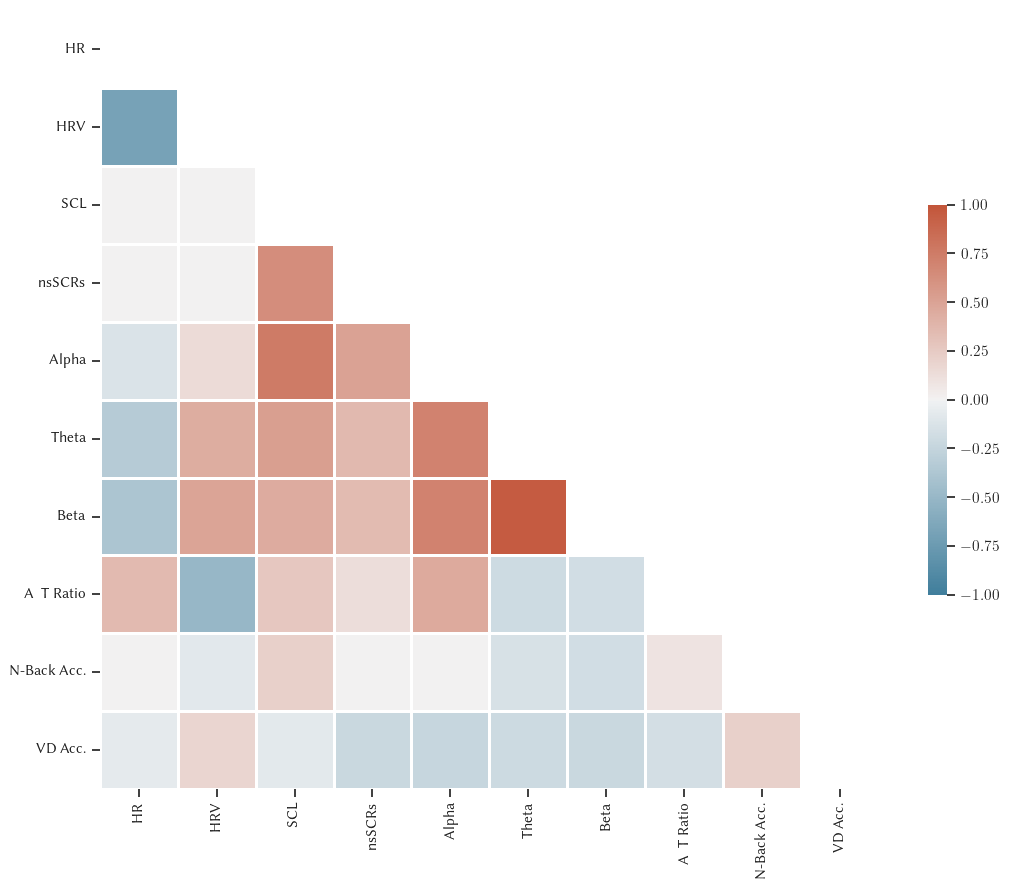

In [4]:
import seaborn as sns

df = df_all[['workload', 'ecg_rate_mean', 'hrv_rmssd','tonic_avg', 'amplitude_avg', 'alpha', 'theta', 'beta', 'alpha_theta_ratio', 'nbackAccuracy', 'adAccuracy']]
df = df.rename(columns={"ecg_rate_mean": "HR", "hrv_rmssd": "HRV", "tonic_avg": "SCL", "amplitude_avg": "nsSCRs"
                               , "alpha": "Alpha", "theta": "Theta", "beta": "Beta", "alpha_theta_ratio": "A \ T Ratio",
                                "nbackAccuracy": "N-Back Acc.",
                                "adAccuracy": "VD Acc."})
corr = df.corr()
corr[(np.abs(corr) < 0.05)] = 0
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

plt.tight_layout()
plt.savefig('figures/fig5.pdf')